# Project: Wrangling and Analyze Data

# Data Gathering

In [793]:
# importing the essential libraries and Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) from Udacity
import pandas as pd
import numpy as np
import requests 
import os 
df = pd.read_csv('twitter-archive-enhanced.csv')

In [794]:
# see all the columns and the cells content
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 800)

In [795]:
# Using the Requests library to download the tweet image prediction (image_predictions.tsv)
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open("call_your_file_a_name.tsv", mode='wb') as file:
    file.write(response.content) 

In [797]:
df.prediction = pd.read_csv('call_your_file_a_name.tsv', sep='\t')


In [798]:
!pip install -U tweepy==4.0

In [31]:
# Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

import tweepy
# https://stackoverflow.com/questions/66156958/how-to-acess-tweets-with-bearer-token-using-tweepy-in-python

consumer_key = "HIDDEN" # my API Key
consumer_secret ="HIDDEN" # my API Key Secret
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

# setting "wait_on_rate_limit=True" otherwise, after 900 twits 
api = tweepy.API(auth, wait_on_rate_limit=True)


In [799]:
tweet_ids = df.tweet_id.values
len(tweet_ids)


2356

In [35]:
%%time

import json

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
# Saving each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop takes 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            print("Success")
            outfile.write('\n')
        except Exception as e:
            print("Fail")
            fails_dict[tweet_id] = e
        

print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Rate limit reached. Sleeping for: 653


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Rate limit reached. Sleeping for: 654


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

In [801]:
df.son = pd.read_json('tweet_json.txt', lines=True)

# Assessing Data

In [802]:
df.son.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [803]:
df.son.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': '', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com | nonprofit: @15outof10 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/YPc2Xq4Va2', 'entities': {'url': {'urls': [{'url': 'https://t.co/YPc2Xq4Va2', 'expanded_url': 'http://links.weratedogs.com', 'display_url': 'links.weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 9379709, 'friends_count': 21, 'listed_count': 7841, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 147412, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 17609, 'lang': None,...",NaN,NaN,None,NaN,False,6876,32911,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/D

In [804]:
df.son.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 270
source                              0
in_reply_to_status_id            2248
in_reply_to_status_id_str        2248
in_reply_to_user_id              2248
in_reply_to_user_id_str          2248
in_reply_to_screen_name          2248
user                                0
geo                              2325
coordinates                      2325
place                            2324
contributors                     2325
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                132
possibly_sensitive_appealable     132
lang        

In [805]:
df.son.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2325 non-null   datetime64[ns, UTC]
 1   id                             2325 non-null   int64              
 2   id_str                         2325 non-null   int64              
 3   full_text                      2325 non-null   object             
 4   truncated                      2325 non-null   bool               
 5   display_text_range             2325 non-null   object             
 6   entities                       2325 non-null   object             
 7   extended_entities              2055 non-null   object             
 8   source                         2325 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [807]:
df.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None


In [808]:
df.tail(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [809]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [810]:
df.duplicated().sum()

0

In [811]:
df.prediction.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1572,795076730285391872,https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg,2,gas_pump,0.676439,False,harvester,0.049995,False,swing,0.04466,False


In [812]:
df.prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [813]:
df.prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [814]:
df.prediction.duplicated().sum()

0

## Quality issues

1. There were a lot of null data in columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp. We did not need thses coulmns and I could drop them. 

2. There were some rows without an image that the “jpg_url” column was not null. Therefore, I dropped them. 

3. The images which did not display dogs were the ones without a dog breed identification in the df_api were dropped from the data.

4. The type of tweet_id was an integer. It could be changed to str type.

5. The type of timestamp wass not datetime. I changed the type of timestamp to datetime type.

6. There were some rows containing two or more rating numbers. I removed these rows to have a clean data. 

7. There were some null values in two columns. I removed the null values from "reteet_count" and "favorite_count".

8. I wantwd to be sure I had only tweets beyond August 1st, 2017.

9. Replacing the wrong names of the name column to nan.

# Tidiness issues

1. For merging df.json to the other data I needed to change the name of id to tweet_id. 

2. For better analysisi we needed to merge the tables. I merged the df data to df.json by tweet_id column and merged the df.prediction table to the merged table.

3. For the columns with "None" replaced "None" with "" in each column and add the four string columns together to create one column called dog_type and remove three columns.

4. For selecting the breed with the highest confidence, drop the p2 and p3 and p1 to make a column as breed. 

5. Splitting timestamp column into two columns for date and time and dropping timestamp


# Tidiness issues

## Issue 1

## Define:

#### Changing the name of column id to tweet_id for joining to the other tables

## Code:

In [912]:
# changing the names of columns especially id to tweet_id for joining to the other tables
df.json = pd.DataFrame().assign(tweet_id = df.son['id'], retweet_count = df.son['retweet_count'], favorite_count = df.son['favorite_count'])

## Test:

In [913]:
df.json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6876,32911
1,892177421306343426,5179,28447
2,891815181378084864,3423,21376
3,891689557279858688,7085,35878
4,891327558926688256,7599,34321


## Issue 2

## Define 1:

#### Merging the df data to df.json by tweet_id column 

## Code 1:

In [914]:
# merging the df data to df.json by tweet_id
total = df.merge(df.json, how='left', on=['tweet_id'])

## Test 1:

In [915]:
# checking the merge
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [916]:
total.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,6876.0,32911.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,5179.0,28447.0


## Define 2:

#### Merging the df.prediction table to the merged table

## Code 2:

In [917]:
# merging the df.prediction table to the merged table
total_table = total.merge(df.prediction, how='left', on=['tweet_id'] )

## Test 2:

In [918]:
# checking the total table data after merging
total_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [919]:
total_table.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,6876.0,32911.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,5179.0,28447.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,3423.0,21376.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,7085.0,35878.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [920]:
# saving the file as a csv file
total_table_save = dict(method='zip',
                        archive_name='out.csv')  
df.to_csv('out.zip', index=False,
          compression=total_table_save)  

In [921]:
# checking the save file 
total_table_save

{'method': 'zip', 'archive_name': 'out.csv'}

In [922]:
# making a copy of data  for cleaning 
total_table_clean = total_table.copy()

In [923]:
# Checking for any duplicated data
total_table_clean.index.duplicated().any().sum()

0

In [924]:
# checking for the null data
total_table_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
retweet_count                   31
favorite_count                  31
jpg_url                        281
img_num                        281
p1                             281
p1_conf                        281
p1_dog                         281
p2                             281
p2_conf                        281
p2_dog                         281
p3                             281
p3_conf             

## Cleaning Data

#### Issue 1

## Define: 

#### 1. There are a lot of null data in columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp. Dopping these columns.

## Code:


In [925]:
list = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
        'retweeted_status_user_id', 'retweeted_status_timestamp']

for i in list:
    total_table_clean = total_table_clean[total_table_clean[i].isnull()]
    total_table_clean = total_table_clean.drop([i], axis = 1)

## Test:

In [926]:
total_table_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   expanded_urls       2094 non-null   object 
 5   rating_numerator    2097 non-null   int64  
 6   rating_denominator  2097 non-null   int64  
 7   name                2097 non-null   object 
 8   doggo               2097 non-null   object 
 9   floofer             2097 non-null   object 
 10  pupper              2097 non-null   object 
 11  puppo               2097 non-null   object 
 12  retweet_count       2089 non-null   float64
 13  favorite_count      2089 non-null   float64
 14  jpg_url             1971 non-null   object 
 15  img_num             1971 non-null   float64
 16  p1    

In [927]:
total_table_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'retweet_count', 'favorite_count', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

### Issue 2

## Define: 

#### There are some rows without an image that the “jpg_url” column is not null. Therefore, we can drop them.

## Code:

In [928]:
total_table_clean.jpg_url.isnull().sum()

126

In [929]:
# There are some rows without an image that the “jpg_url” column is not null
total_table_clean.dropna(subset = ["jpg_url"], inplace = True)

## Test:

In [930]:
total_table_clean.jpg_url.isnull().sum()

0

#### Issue 3

## Define: 

#### The images which do not display dogs are the ones without a dog breed identification in the df_api were droped from the data.

## Code:

In [931]:
# The images which do not display dogs are the ones without a dog breed identification in the df_api
total_table_clean.drop(total_table_clean.query("p1_dog == False and p2_dog == False and p3_dog == False").index, inplace = True)

## Test:

In [932]:
# checking for the null data again 
total_table_clean.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
retweet_count         8
favorite_count        8
jpg_url               0
img_num               0
p1                    0
p1_conf               0
p1_dog                0
p2                    0
p2_conf               0
p2_dog                0
p3                    0
p3_conf               0
p3_dog                0
dtype: int64

##### Issue 4

## Define: 

#### The type of tweet_id is integer. It can be changed str.

## Code:

In [933]:
# changing the type of tweet_id to str
total_table_clean.tweet_id = total_table_clean.tweet_id.astype(str)

## Test:

In [934]:
total_table_clean.tweet_id.info()

<class 'pandas.core.series.Series'>
Int64Index: 1666 entries, 1 to 2355
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
1666 non-null   object
dtypes: object(1)
memory usage: 26.0+ KB


###### Issue 5

## Define:

#### Changing the type of timestamp to datetime

## Code:

In [935]:
# changing the type of timestamp to datetime
total_table_clean.timestamp = pd.to_datetime(total_table_clean.timestamp)

## Test:

In [936]:
total_table_clean.timestamp.info()

<class 'pandas.core.series.Series'>
Int64Index: 1666 entries, 1 to 2355
Series name: timestamp
Non-Null Count  Dtype              
--------------  -----              
1666 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 26.0 KB


## Issue 6

## Define:

#### Removing the rows with multiple ratings

## Code:

In [937]:
# the rows contain two or more rating numbers
df_duplicate_ratings = total_table_clean.copy()
pattern = '\d+\/\d+'
df_duplicate_ratings['all_patterns'] = df_duplicate_ratings.text.str.findall(pattern)
df_duplicate_ratings['patterns_count'] = df_duplicate_ratings['all_patterns'].apply(lambda x: len(x))
# finding all the index 
duplicate_rating_index = df_duplicate_ratings.index[df_duplicate_ratings['patterns_count'] != 1].tolist()
# removing the rows with multiple ratings
total_table_clean = total_table_clean.loc[~total_table_clean.index.isin(duplicate_rating_index)]


## Test:

In [938]:
total_table_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640 entries, 1 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1640 non-null   object             
 1   timestamp           1640 non-null   datetime64[ns, UTC]
 2   source              1640 non-null   object             
 3   text                1640 non-null   object             
 4   expanded_urls       1640 non-null   object             
 5   rating_numerator    1640 non-null   int64              
 6   rating_denominator  1640 non-null   int64              
 7   name                1640 non-null   object             
 8   doggo               1640 non-null   object             
 9   floofer             1640 non-null   object             
 10  pupper              1640 non-null   object             
 11  puppo               1640 non-null   object             
 12  retweet_count       1632 non-null 

# Tidiness issues

 ## Issue 3

## Define:

#### Replacing “None” with “” in each column and adding the four string columns together to create one column called dog_type and drop three columns

## Code:

In [939]:
# replacing “None” with “” in each column
for x in ["doggo", "floofer", "pupper", "puppo"]:
    total_table_clean[x].replace("None", "", inplace = True)
# Adding the four string columns together to create one column called dog_type and drop three columns
total_table_clean['dog_type'] = total_table_clean['doggo'] + total_table_clean[
 'floofer']+ total_table_clean['pupper'] + total_table_clean['puppo']
total_table_clean.drop(["doggo", "floofer", "pupper", "puppo"], inplace=True, axis = 1)

## Test:

In [940]:
total_table_clean.dog_type.value_counts()

                1385
pupper           164
doggo             54
puppo             21
floofer            7
doggopupper        7
doggopuppo         1
doggofloofer       1
Name: dog_type, dtype: int64

In [941]:
# Making the space between to words in column dog_type
total_table_clean.loc[total_table_clean.dog_type == 'doggopupper', 'dog_type'] = 'doggo, pupper'
total_table_clean.loc[total_table_clean.dog_type == 'doggopuppo', 'dog_type'] = 'doggo, puppo'
total_table_clean.loc[total_table_clean.dog_type == 'doggofloofer', 'dog_type'] = 'doggo, floofer'

In [942]:
total_table_clean.dog_type.value_counts()

                  1385
pupper             164
doggo               54
puppo               21
floofer              7
doggo, pupper        7
doggo, puppo         1
doggo, floofer       1
Name: dog_type, dtype: int64

## Cleaning Data

## Issue 7

## Define:

#### Removing the null values from "reteet_count" and "favorite_count"

In [943]:
# finding the null data
total_table_clean[total_table_clean["retweet_count"].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
104,872261713294495745,2017-06-07 01:19:32+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Harry. His ears are activated one at a time. Incredibly rare to witness in person. Very special moment here. 13/10 blessed as h*ck https://t.co/ejHvGDfWoa,"https://twitter.com/dog_rates/status/872261713294495745/photo/1,https://twitter.com/dog_rates/status/872261713294495745/photo/1",13,10,Harry,NaN,NaN,https://pbs.twimg.com/media/DBrlZk2UQAAfAkd.jpg,2.0,Labrador_retriever,0.972019,True,flat-coated_retriever,0.008178,True,Chesapeake_Bay_retriever,0.007359,True,
253,844704788403113984,2017-03-23 00:18:10+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Luna. It's her first time outside and a bee stung her nose. Completely h*ckin uncalled for. 13/10 where's the bee I just wanna talk https://t.co/2RYiLGHuPN,https://twitter.com/dog_rates/status/844704788403113984/photo/1,13,10,Luna,NaN,NaN,https://pbs.twimg.com/media/C7j-hkSW0AIxCZC.jpg,1.0,Labrador_retriever,0.980213,True,golden_retriever,0.007012,True,beagle,0.003147,True,
296,837366284874571778,2017-03-02 18:17:34+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lucy. She has a portrait of herself on her ear. Excellent for identification pupposes. 13/10 innovative af https://t.co/uNmxbL2lns,https://twitter.com/dog_rates/status/837366284874571778/photo/1,13,10,Lucy,NaN,NaN,https://pbs.twimg.com/media/C57sMJwXMAASBSx.jpg,1.0,American_Staffordshire_terrier,0.660085,True,Staffordshire_bullterrier,0.334947,True,dalmatian,0.002697,True,
363,829374341691346946,2017-02-08 17:00:26+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Astrid. She's a guide doggo in training. 13/10 would follow anywhere https://t.co/xo7FZFIAao,"https://twitter.com/dog_rates/status/829374341691346946/photo/1,https://twitter.com/dog_rates/status/829374341691346946/photo/1",13,10,Astrid,NaN,NaN,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1.0,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True,doggo
750,779123168116150273,2016-09-23 01:00:13+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Reggie. He hugs everyone he meets. 12/10 keep spreading the love Reggie https://t.co/uMfhduaate,https://twitter.com/dog_rates/status/779123168116150273/photo/1,12,10,Reggie,NaN,NaN,https://pbs.twimg.com/media/CtAAYizW8AAWzBZ.jpg,1.0,toy_poodle,0.431080,True,soft-coated_wheaten_terrier,0.060365,True,cocker_spaniel,0.059845,True,
887,759923798737051648,2016-08-01 01:28:46+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs... this is a Taiwanese Guide Walrus. Im getting real heckin tired of this. Please send dogs. 10/10 https://t.co/49hkNAsubi,https://twitter.com/dog_rates/status/759923798737051648/photo/1,10,10,None,NaN,NaN,https://pbs.twimg.com/media/CovKqSYVIAAUbUW.jpg,1.0,Labrador_retriever,0.324579,True,seat_belt,0.109168,False,pug,0.102466,True,
932,754011816964026368,2016-07-15 17:56:40+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He pouts until he gets to go on the swing. 12/10 manipulative af https://t.co/ilwQqWFKCh,"https://twitter.com/dog_rates/status/754011816964026368/photo/1,https://twitter.com/dog_rates/status/754011816964026368/photo/1",12,10,Charlie,NaN,NaN,https://pbs.twimg.com/media/CnbJuPoXEAAjcVF.jpg,1.0,French_bulldog,0.600985,True,Boston_bull,0.273176,True,boxer,0.056772,True,
1726,680055455951884288,2015-12-24 16:00:30+00:00,"<a href=""https://about.twitter.co

In [944]:
total_table_clean['retweet_count'].isnull().any()
total_table_clean['favorite_count'].isnull().any()

True

## Code:

In [945]:
# dropping the null data
total_table_clean = total_table_clean.dropna()

## Test:

In [946]:
total_table_clean['retweet_count'].isnull().any()
total_table_clean['favorite_count'].isnull().any()

False

In [947]:
 total_table_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1632 entries, 1 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1632 non-null   object             
 1   timestamp           1632 non-null   datetime64[ns, UTC]
 2   source              1632 non-null   object             
 3   text                1632 non-null   object             
 4   expanded_urls       1632 non-null   object             
 5   rating_numerator    1632 non-null   int64              
 6   rating_denominator  1632 non-null   int64              
 7   name                1632 non-null   object             
 8   retweet_count       1632 non-null   float64            
 9   favorite_count      1632 non-null   float64            
 10  jpg_url             1632 non-null   object             
 11  img_num             1632 non-null   float64            
 12  p1                  1632 non-null 

## Issue 8

## Define:

#### Making sure we had only tweets beyond August 1st, 2017 

## Code:

In [948]:
total_table_clean.timestamp.max()

Timestamp('2017-08-01 00:17:27+0000', tz='UTC')

## Test:

In [949]:
total_table_clean.timestamp.max()

Timestamp('2017-08-01 00:17:27+0000', tz='UTC')

## Tidiness issues

## Issue 4

## Define:

#### Using the breed with the highest confidence

## Code:

In [950]:
def breed_extraction(row):
    breed_conf = 0
    breed_name = ''
    is_breed = False
    if(row.p1_dog == True):
        if(row.p1_conf >= breed_conf):
            breed_conf = row.p1_conf
            breed_name = row.p1
            is_breed = True
    if(row.p2_dog == True):
        if(row.p2_conf >= breed_conf):
            breed_conf = row.p2_conf
            breed_name = row.p2
            is_breed = True
    if(row.p3_dog == True):
        if(row.p2_conf >= breed_conf):
            breed_conf = row.p3_conf
            breed_name = row.p3
            is_breed = True
    if is_breed == False:
        return np.nan
    else:
        return breed_name     
    
total_table_clean['breed'] = total_table_clean.apply(breed_extraction,axis=1)

In [951]:
total_table_clean.drop(columns=['p1','p2','p3','p1_dog','p2_dog','p3_dog','p1_conf', 'p2_conf', 'p3_conf'],inplace=True)

## Test:

In [952]:
total_table_clean.breed.unique()

array(['Chihuahua', 'Labrador_retriever', 'basset',
       'Chesapeake_Bay_retriever', 'Appenzeller', 'Pomeranian',
       'Irish_terrier', 'Pembroke', 'Samoyed', 'French_bulldog',
       'golden_retriever', 'whippet', 'Siberian_husky',
       'Mexican_hairless', 'kuvasz', 'pug', 'Blenheim_spaniel',
       'malamute', 'Italian_greyhound', 'chow', 'German_shepherd',
       'Doberman', 'Eskimo_dog', 'Weimaraner', 'Saluki',
       'miniature_pinscher', 'German_short-haired_pointer',
       'English_springer', 'vizsla', 'bloodhound', 'Bernese_mountain_dog',
       'West_Highland_white_terrier', 'cocker_spaniel',
       'flat-coated_retriever', 'Cardigan', 'Newfoundland', 'dalmatian',
       'Shetland_sheepdog', 'komondor', 'kelpie',
       'Greater_Swiss_Mountain_dog', 'Border_collie', 'bull_mastiff',
       'Staffordshire_bullterrier', 'Australian_terrier',
       'Bouvier_des_Flandres', 'Bedlington_terrier', 'Boston_bull',
       'black-and-tan_coonhound', 'Great_Dane', 'EntleBucher',
  

### Issue 5

## Define:

####  Splitting timestamp to two columns for date and time and dropping timestamp

## Code:

In [953]:
# spliting timestamp to two columns for date and time and drop timestamp
total_table_clean['date'] = pd.to_datetime(total_table_clean['timestamp']).dt.date
total_table_clean['time'] = pd.to_datetime(total_table_clean['timestamp']).dt.time
total_table_clean.drop(['timestamp'], inplace=True, axis = 1)

## Test:

In [954]:
total_table_clean['date']

1       2017-08-01
2       2017-07-31
3       2017-07-30
4       2017-07-29
5       2017-07-29
           ...    
2351    2015-11-16
2352    2015-11-16
2353    2015-11-15
2354    2015-11-15
2355    2015-11-15
Name: date, Length: 1632, dtype: object

## Cleaning Data

## Issue 9

## Define:

#### Replacing the wrong names of name column to nan 

In [955]:
total_table_clean[total_table_clean.name.str.islower()].name.value_counts()

a               46
the              7
very             3
one              3
just             3
an               3
quite            2
getting          2
not              1
my               1
unacceptable     1
all              1
infuriating      1
incredibly       1
actually         1
officially       1
light            1
space            1
Name: name, dtype: int64

## Code:

In [956]:
# replacing the stopwords into nan
stop_words = ['None','a','the','just', 'an','one', 'very', 'quite', 'getting' , 'not','my', 'unacceptable', 'all', 
              'infuriating', 'incredibly','actually','officially','light' , 'space' ]
for x in stop_words:
    total_table_clean["name"].replace(x, np.nan, inplace = True)

## Test:

In [957]:
total_table_clean.name.value_counts()

Cooper        10
Charlie        9
Lucy           9
Tucker         9
Oliver         9
              ..
Al             1
Jackson        1
Carbon         1
Klein          1
Christoper     1
Name: name, Length: 817, dtype: int64

In [958]:
total_table_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1632 entries, 1 to 2355
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1632 non-null   object 
 1   source              1632 non-null   object 
 2   text                1632 non-null   object 
 3   expanded_urls       1632 non-null   object 
 4   rating_numerator    1632 non-null   int64  
 5   rating_denominator  1632 non-null   int64  
 6   name                1164 non-null   object 
 7   retweet_count       1632 non-null   float64
 8   favorite_count      1632 non-null   float64
 9   jpg_url             1632 non-null   object 
 10  img_num             1632 non-null   float64
 11  dog_type            1632 non-null   object 
 12  breed               1632 non-null   object 
 13  date                1632 non-null   object 
 14  time                1632 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 204.0

## Storing Data

In [970]:
total_table_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

## Insights:

1. Top rated dogs

2. Most dog breeds

3. Top common name for dogs.

4. Top favorite dogs

5. Top retweeted dogs

6. Top stages of dogs 

In [960]:
total_table_clean.query('rating_numerator == 14.0').breed.value_counts()

Pembroke                   4
French_bulldog             3
golden_retriever           2
Samoyed                    1
Chihuahua                  1
black-and-tan_coonhound    1
groenendael                1
bloodhound                 1
Bedlington_terrier         1
Rottweiler                 1
Pomeranian                 1
Irish_setter               1
Gordon_setter              1
standard_poodle            1
Eskimo_dog                 1
Name: breed, dtype: int64

In [961]:
total_table_clean.breed.value_counts()

golden_retriever        148
Labrador_retriever      104
Pembroke                 93
Chihuahua                84
pug                      62
                       ... 
Bouvier_des_Flandres      1
Scotch_terrier            1
Japanese_spaniel          1
standard_schnauzer        1
Irish_wolfhound           1
Name: breed, Length: 113, dtype: int64

In [962]:
total_table_clean.name.value_counts()

Cooper        10
Charlie        9
Lucy           9
Tucker         9
Oliver         9
              ..
Al             1
Jackson        1
Carbon         1
Klein          1
Christoper     1
Name: name, Length: 817, dtype: int64

In [963]:
total_table_clean.groupby(['breed']).favorite_count.sum().sort_values(ascending=False)

breed
golden_retriever      1509870.0
Labrador_retriever    1021793.0
Pembroke               911626.0
Chihuahua              598816.0
French_bulldog         499807.0
                        ...    
Scotch_terrier           2949.0
Ibizan_hound             2737.0
standard_schnauzer       1640.0
Irish_wolfhound          1261.0
Japanese_spaniel         1089.0
Name: favorite_count, Length: 113, dtype: float64

In [964]:
total_table_clean.groupby(['breed']).retweet_count.sum().sort_values(ascending=False)

breed
golden_retriever      418638.0
Labrador_retriever    311176.0
Pembroke              238495.0
Chihuahua             187025.0
Samoyed               144912.0
                        ...   
Ibizan_hound            1003.0
Scotch_terrier           981.0
standard_schnauzer       707.0
Irish_wolfhound          646.0
Japanese_spaniel         350.0
Name: retweet_count, Length: 113, dtype: float64

In [965]:
total_table_clean.groupby(['dog_type']).retweet_count.sum().sort_values(ascending=False)

dog_type
                  2885211.0
pupper             318593.0
doggo              309863.0
puppo              108218.0
floofer             27346.0
doggo, pupper       27215.0
doggo, puppo        15687.0
doggo, floofer       2750.0
Name: retweet_count, dtype: float64

## Visualization

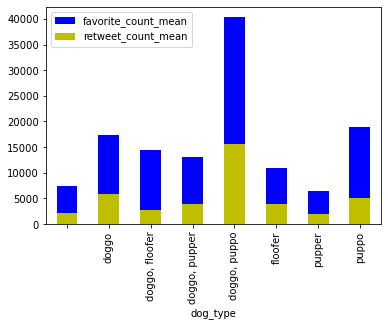

In [967]:
# comparing the mean of favorite_count and the mean of retweet_count between different stages of dogs
import matplotlib.pyplot as plt
%matplotlib inline
total_table_clean.groupby('dog_type')['favorite_count'].mean().plot(kind='bar', color='b', label = 'favorite_count_mean')
plt.xlabel('dog_type')
plt.legend(loc='upper left')

total_table_clean.groupby('dog_type')['retweet_count'].mean().plot(kind='bar', color='y', label = 'retweet_count_mean')
plt.xlabel('dog_type')
plt.legend(loc='upper left')

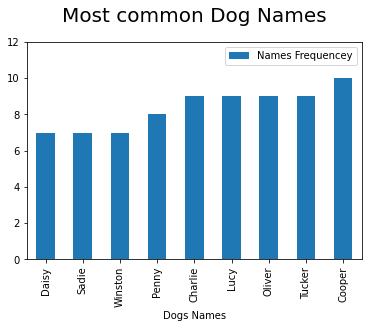

In [968]:
# most common name of dogs
named_dogs = total_table_clean.query('name == name')
named_dogs_grouped = named_dogs.groupby('name').count()[['tweet_id']]
named_dogs_grouped.rename(columns={'tweet_id':'name_count'}, inplace=True)
named_dogs_grouped.query('name_count >= 7').sort_values(by=['name_count']).plot.bar()
plt.ylim(top=12)
plt.title("Most common Dog Names",{'fontsize': 20},pad=20)
plt.xlabel("Dogs Names")
plt.legend(["Names Frequencey"])

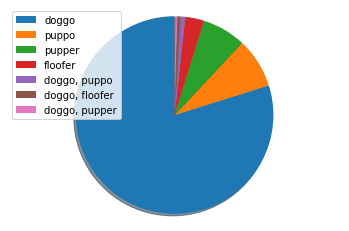

In [969]:
# indicating the stages of dogs based on favorite_count
labels = total_table_clean.dog_type.unique().tolist()[1:]
sizes =total_table_clean.groupby(['dog_type']).favorite_count.sum().sort_values(ascending=False).tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes,shadow=True, startangle=90)

plt.legend(labels)
ax1.axis('equal')

plt.show()